<a href="https://colab.research.google.com/github/marce3-2140/Haemoglobin-Level-Prediction/blob/main/SurveyClinicalData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/fralfaro/CD-DS-Course/blob/main/docs/extra_project_template/template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**📈 Clinical, Anthropometric & Bio-Chemical Survey**



**Presentado por:** Marcela Giraldo

* **Tomado de:** [kaggle.com/datasets/rajanand/cab-survey](https://www.kaggle.com/datasets/rajanand/cab-survey)
* **fecha de publicación:** Tue Aug 08/2017 14:16:18
* **Track**: Clasificar las características de la encuesta anual de casos de mortalidad analizando los niveles de hemoglobina para determinar si presentaban anemia.
* **Autor:** Rajanand Ilangovan.
* **cita**: Department of Health and Family Welfare, Govt. of India has published this data in Open Govt Data Platform India portal under Govt. Open Data License - India. ([link](https://data.gov.in/government-open-data-license-india))
* **Licence:** CC BY-SA 4.0


**Contexto:**
___

> _*Este conjunto de datos a nivel de unidad contiene los detalles de la encuesta clínica, antropométrica y bioquímica (CAB). Para complementar la información proporcionada por la Encuesta Anual de Salud (AHS) , se ha introducido un componente de biomarcadores para recopilar datos sobre el estado nutricional, enfermedades del estilo de vida como diabetes e hipertensión y anemia en los estados del Empowered Action Group y Assam. Este componente, a saber, la encuesta clínica, antropométrica y bioquímica (CAB), se lleva a cabo en una submuestra de peste equina, para el modelo tomamos una submuestra con los estados de Uttarakhand, Assam y Chhattisgarh. Hay un total de 315092 mil observaciones y 54 variables en este conjunto de datos.*_

> **Encuesta:**
Encuesta de referencia: 2010-11 (4,14 millones de hogares en la muestra)
  * 1.ª actualización: 2011-12 (4,28 millones de hogares en la muestra)
  * 2.ª actualización: 2012-13 (4,32 millones de hogares en la muestra)
  * Estos nueve estados, que representan alrededor del 48 por ciento de la población total, el 59 por ciento de los nacimientos, el 70 por ciento de las muertes infantiles, el 75 por ciento de las muertes de menores de 5 años y el 62 por ciento de las muertes maternas en el país, son los estados de mayor enfoque en vista de su fertilidad y mortalidad relativamente más altas.

> **Objetivos del análisis:**
-  [x] Basándonos en las descripciones de las variables proporcionadas, algunas posibles variables objetivo podrían estar relacionadas con las condiciones de salud y enfermedades específicas que se mencionan en la encuesta.
- [x] Haemoglobin_level: Si el objetivo es estudiar la anemia en la población encuestada, esta variable podría ser una opción para medir los niveles de hemoglobina y evaluar la presencia de anemia.
- [x] Diabetes_test y fasting_blood_glucose_mg_dl: Si el objetivo es analizar la diabetes, estas variables pueden ser útiles para estudiar la prevalencia de diabetes y los niveles de glucosa en ayunas.
- [x] BP_systolic y BP_Diastolic: Si el objetivo es estudiar la presión arterial, estas variables pueden ser utilizadas para analizar la presión arterial sistólica y diastólica.
- [x] Illness_type: Evaluar la prevalencia de enfermedades agudas en la población, esta variable puede ser relevante para identificar el tipo de enfermedades agudas experimentadas en los últimos 15 días.

#### **Importe de Librerías**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# preprocesar
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

# modelar
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import DBSCAN
# metricas
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### **Carga de Datos**

**DataSet deL estado de UTTARAKHAND donde se aplico la encuesta**

___

In [ ]:
file_UT = '/content/drive/MyDrive/CodingDojo/ProjectsCodingDojo/Proyecto2/DatosAntropometricosIndia/CAB_05_UT.csv'
df_UT = pd.read_csv(file_UT, low_memory = False)#Es necesario especificar low_memory porque hay tipos de datos mixtos.
df_UT["State"]="UTTARAKHAND"
shape_UT = df_UT.shape
print(shape_UT)
df_UT.head()

(67342, 55)


,state_code,district_code,rural_urban,stratum,psu_id,ahs_house_unit,house_hold_no,date_survey,test_salt_iodine,record_code_iodine,...,water_month,ani_milk_month,semisolid_month_or_day,solid_month,vegetables_month_or_day,illness_type,illness_duration,treatment_type,v54,State
0,5,1,2,0,2824556,29,4,19/05/2014,30,3,...,-1,-1,-1,-1,-1,-1,-1,-1,NaN,UTTARAKHAND
1,5,1,2,0,2824557,28,3,19/05/2014,30,3,...,-1,-1,-1,-1,-1,-1,-1,-1,NaN,UTTARAKHAND
2,5,1,2,0,2824558,97,5,20/05/2014,30,3,...,-1,-1,-1,-1,-1,-1,-1,-1,NaN,UTTARAKHAND
3,5,1,2,0,2823671,32,1,15/05/2014,30,3,...,-1,-1,-1,-1,-1,-1,-1,-1,NaN,UTTARAKHAND
4,5,1,2,0,2824555,26,7,19/05/2014,30,3,...,-1,-1,-1,-1,-1,-1,-1,-1,NaN,UTTARAKHAND


**DataSet del estado de ASSAM donde se aplico la encuesta**

___

In [ ]:
file_AS = '/content/drive/MyDrive/CodingDojo/ProjectsCodingDojo/Proyecto2/DatosAntropometricosIndia/CAB_18_AS.csv'
df_AS = pd.read_csv(file_AS, low_memory=False)
df_AS["State"]="ASSAM"
shape_AS = df_AS.shape
print(shape_AS)
df_AS.head()

(142840, 55)


,state_code,district_code,rural_urban,stratum,psu_id,ahs_house_unit,house_hold_no,date_survey,test_salt_iodine,record_code_iodine,...,water_month,ani_milk_month,semisolid_month_or_day,solid_month,vegetables_month_or_day,illness_type,illness_duration,treatment_type,v54,State
0,18,1,1,2,1075624,130,1,12/08/2014,30,3,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,ASSAM
1,18,1,1,1,1077449,82,1,12/02/2014,30,3,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,ASSAM
2,18,1,1,2,1074487,25,1,12/01/2014,30,3,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,ASSAM
3,18,1,1,2,1076125,424,1,13/12/2014,30,3,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,ASSAM
4,18,1,1,1,1076804,90,1,29/11/2014,30,3,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,ASSAM


**DataSet del estado de CHHATTISGARH donde se aplico la encuesta**

___

In [ ]:
file_CT = '/content/drive/MyDrive/CodingDojo/ProjectsCodingDojo/Proyecto2/DatosAntropometricosIndia/CAB_22_CT.csv'
df_CT = pd.read_csv(file_CT, low_memory=False)
shape_CT = df_CT.shape
print(shape_CT)
df_CT["State"]="CHHATTISGARH"
df_CT.head()

(104915, 54)


,state_code,district_code,rural_urban,stratum,psu_id,ahs_house_unit,house_hold_no,date_survey,test_salt_iodine,record_code_iodine,...,water_month,ani_milk_month,semisolid_month_or_day,solid_month,vegetables_month_or_day,illness_type,illness_duration,treatment_type,v54,State
0,22,1,1,1,1434366,9,2,6/11/2014,15,3,...,-1,-1,-1,-1,-1,-1,-1,-1,NaN,CHHATTISGARH
1,22,1,1,1,1434444,9,2,6/11/2014,15,3,...,-1,-1,-1,-1,-1,-1,-1,-1,NaN,CHHATTISGARH
2,22,1,1,1,1434093,11,1,6/11/2014,15,3,...,-1,-1,-1,-1,-1,-1,-1,-1,NaN,CHHATTISGARH
3,22,1,1,1,1434117,11,1,6/11/2014,15,3,...,-1,-1,-1,-1,-1,-1,-1,-1,NaN,CHHATTISGARH
4,22,1,1,1,1434315,11,1,6/11/2014,15,3,...,-1,-1,-1,-1,-1,-1,-1,-1,NaN,CHHATTISGARH


**Concatenar Los Datos En Uno Solo DataFrame**

In [ ]:
#Concatenamos
df = pd.concat([df_UT,df_AS, df_CT], ignore_index=True)
# Reemplazamos el indice por la columna de registro unico de encuesta psu_id
df.head()

,state_code,district_code,rural_urban,stratum,psu_id,ahs_house_unit,house_hold_no,date_survey,test_salt_iodine,record_code_iodine,...,water_month,ani_milk_month,semisolid_month_or_day,solid_month,vegetables_month_or_day,illness_type,illness_duration,treatment_type,v54,State
0,5,1,2,0,2824556,29,4,19/05/2014,30,3,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,UTTARAKHAND
1,5,1,2,0,2824557,28,3,19/05/2014,30,3,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,UTTARAKHAND
2,5,1,2,0,2824558,97,5,20/05/2014,30,3,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,UTTARAKHAND
3,5,1,2,0,2823671,32,1,15/05/2014,30,3,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,UTTARAKHAND
4,5,1,2,0,2824555,26,7,19/05/2014,30,3,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,UTTARAKHAND


## **I. Análisis Exploratorio de Datos**

**Cuantas Columnas Y Filas Tiene El Conjunto De Datos**

In [ ]:
data_original = df.shape
data_original

(315097, 55)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315097 entries, 0 to 315096
Data columns (total 55 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   state_code                        315097 non-null  object 
 1   district_code                     315097 non-null  int64  
 2   rural_urban                       315097 non-null  object 
 3   stratum                           315097 non-null  int64  
 4   psu_id                            315097 non-null  int64  
 5   ahs_house_unit                    315097 non-null  int64  
 6   house_hold_no                     315097 non-null  int64  
 7   date_survey                       315097 non-null  object 
 8   test_salt_iodine                  315097 non-null  int64  
 9   record_code_iodine                315097 non-null  int64  
 10  record_code_iodine_reason         94148 non-null   object 
 11  sl_no                             315097 non-null  i

## **II. Limpieza de datos**

**Tratamiento de Duplicados**

In [ ]:
df.duplicated().sum()

0

**Eliminación De variables inncesarias**

| Columna                     | Descripcion                                                                                                    |
|-----------------------------|----------------------------------------------------------------------------------------------------------------|
| 'state_code'                |  Reemplazar valores                                                                                                               |
| 'ahs_house_unit'            | Numero de casa                                                                                                 |
| 'house_hold_no'             | Numero de hogar                                                                                                |
| 'record_code_iodine_reason' | Razon de no aceptar test de yodo                                                                               |
| 'sl_no'                     | Cada registro de casa tiene un numero serial.                                                                  |
| 'usual_residence'           | Si el miembro es residente habitual                                                                            |
| 'usual_residence_reason'    | Razon de porque no es residente habitual                                                                       |
| 'identification_code'       | Numero de identificacion                                                                                       |
| 'stratum'                   | "1 or 2 solo cuando [rural_urban] = 1, or 0 cuando [rural_urban] = 2, esta informacion ya esta en  rural_urban |
| 'district_code'             | Codigo de distrito, ya tenemos State.                                                                          |

In [ ]:
df = df.drop(columns=['psu_id', 'ahs_house_unit', 'house_hold_no',
                      'record_code_iodine_reason', 'sl_no', 'usual_residance',
                      'usual_residance_reason','identification_code',
                      'stratum', 'district_code'
                      ])

**'estate_code'**

La variable state_code la consideramos importante para cuando se modele reconocer los datos en que estado se concentran

**Conozcamos cuantos registros tiene cada estado**

In [ ]:
print("Registros por Estado:\n")
print(f"El estado de Uttarakhand tiene {shape_UT[0]} registros del total de los datos del dataframe")
print(f"El estado de Assam tiene {shape_AS[0]} registros del total de los datos del dataframe")
print(f"El estado de Chhatisgarh tiene {shape_CT[0]} resgistros del total de los datos del dataframe")

Registros por Estado:

El estado de Uttarakhand tiene 67342 registros del total de los datos del dataframe
El estado de Assam tiene 142840 registros del total de los datos del dataframe
El estado de Chhatisgarh tiene 104915 resgistros del total de los datos del dataframe


**Reemplazamos el numero de estado para identificarlos más facilmente**

In [ ]:
df['state_code'].value_counts()

18             142838
22             104915
5               67342
MARRIED             1
NOT AT HOME         1
Name: state_code, dtype: int64

In [ ]:
error_state = df['state_code'] == 'MARRIED'
df.loc[error_state,:].head()

,state_code,rural_urban,date_survey,test_salt_iodine,record_code_iodine,sex,age_code,age,date_of_birth,month_of_birth,...,water_month,ani_milk_month,semisolid_month_or_day,solid_month,vegetables_month_or_day,illness_type,illness_duration,treatment_type,v54,State
110673,MARRIED,Y,-1,-1,-1,-1,-1,-1.0,-1.0,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ASSAM


In [ ]:
error_state = df['state_code'] == 'NOT AT HOME'
df.loc[error_state,:].head()

,state_code,rural_urban,date_survey,test_salt_iodine,record_code_iodine,sex,age_code,age,date_of_birth,month_of_birth,...,water_month,ani_milk_month,semisolid_month_or_day,solid_month,vegetables_month_or_day,illness_type,illness_duration,treatment_type,v54,State
110860,NOT AT HOME,Y,-1,-1,-1,-1,-1,-1.0,-1.0,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ASSAM


**Los dos datos mal digitados corresponden al estado de ASSAM**

In [ ]:
# Reemplazamos valores inconsistentes en 'state_code'
# Mapear los valores en 'state_code' a números
df['state_code'] = df['state_code'].replace({5: 0, '5': 0,
                                             22: 1, '22': 1,
                                             18: 2, '18':2,
                                             'MARRIED': 2,
                                             'NOT AT HOME':2})

In [ ]:
df['state_code'].value_counts()

2    142840
1    104915
0     67342
Name: state_code, dtype: int64

**Identificamos datos nulos en el dataFrame**

In [ ]:
df.isna().sum()

state_code                               0
rural_urban                              0
date_survey                              0
test_salt_iodine                         0
record_code_iodine                       0
sex                                      0
age_code                                 2
age                                      2
date_of_birth                            2
month_of_birth                           2
year_of_birth                            2
weight_measured                          2
weight_in_kg                             2
length_height_measured                   2
length_height_code                       2
length_height_cm                         2
haemoglobin_test                         2
haemoglobin                              2
haemoglobin_level                        2
bp_systolic                              2
bp_systolic_2_reading                    2
bp_diastolic                             2
bp_diastolic_2reading                    2
pulse_rate 

**Proporción de Cantidad de Nulos de Cada Característica**

In [ ]:
v54_missing = (df['v54'].isna().sum()/len(df))*100
print(f"La columna 'v54' tiene {v54_missing:.2f}% de datos nulos")

age_code_missing = (df['age_code'].isna().sum()/len(df))
print(f"La columna 'age_code' tiene {age_code_missing:.2f}% de datos nulos")

ilness_missing = (df['illness_duration'].isna().sum()/len(df))
print(f"La columna 'ilness_duration' tiene {ilness_missing:.2f}% de datos nulos")

La columna 'v54' tiene 100.00% de datos nulos
La columna 'age_code' tiene 0.00% de datos nulos
La columna 'ilness_duration' tiene 0.00% de datos nulos


> **Nota**:
* La columna V54 tiene el 100% de los datos nulos, asi que eliminaremos esta columna ya que no tenemos ninguna informacion para sacar la mediana u otro.
* Eliminamos las filas con datos nulos de columnas como age_code y ilness_type entre otras, con datos perdidos minimos que representan el 0.0001%, ademas encontramos que estan relacionadas estas filas con nulos en todas las columnas con nulos.

In [ ]:
df = df.drop('v54', axis=1)

In [ ]:
df = df.dropna()

### **Tomamos Un Subconjunto de Datos**

___

* Los datos de las encuestas incluyen información de lactantes, niños, adolescentes y adultos, por lo que todas las columnas no aplican a todas las edades, generando datos nulos e inconsistentes cuando no aplica.

* Para el estudio eliminamos las columnas aplicables para adultos, madres gestantes, madres lactantes y niños que superan en promedio la edad de lactancia > 2 años.

* Tomamos un subconjunto de datos con la información de lactantes que a su vez se dubdivide en:

  * [x] Recien nacido (0 a 6 dias)
  * [x] Neonato (7-29 días)
  * [x] Lactancia (lactante menor; 1-12 meses de vida, lactante mayor; 1-2 años)
___

Eliminamos las columnas que no corresponden a niños en periodo de lactancia menor.

In [ ]:
df = df.drop(columns=['marital_status', 'gauna_perfor_not_perfor', 'duration_pregnanacy'])

**Para Dividir el DataFrame por Edad, Debemos Revisar las Variables Relacionadas con la Edad De Los Encuestados**

* age_code: Unidad de registro de la edad
* age
* date_of_birth: DD
* month_of_birth: MM
* year_of_birth: YY

Eliminaremos las columnas innecesarias relacionadas, solo necesitamos la variable 'age' y 'age_code' para identificar la informacion de edad del encuestado.

In [ ]:
df = df.drop(columns=['date_of_birth', 'month_of_birth', 'year_of_birth'])

In [ ]:
df['age_code'].value_counts()

Y    311901
M      3119
D        67
y         4
m         2
Name: age_code, dtype: int64

In [ ]:
# Reemplazamos valores inconsistentes en 'age_code'
# Mapear los valores en 'age_code' a números
mapping = {'D': 0, 'M': 1, 'm': 1, 'Y': 2, 'y': 2}
df['age_code'] = df['age_code'].map(mapping)

In [ ]:
df['age_code'] = df['age_code'].astype(int)
df['age_code'].value_counts()

2    311905
1      3121
0        67
Name: age_code, dtype: int64

In [ ]:
#age_code <= 1 incluye (0 = Dias, 1 = Meses)
df = df.loc[df['age_code'] == 1]
df.head()

,state_code,rural_urban,date_survey,test_salt_iodine,record_code_iodine,sex,age_code,age,weight_measured,weight_in_kg,...,day_or_month_for_breast_feeding,water_month,ani_milk_month,semisolid_month_or_day,solid_month,vegetables_month_or_day,illness_type,illness_duration,treatment_type,State
34,0,2,20/05/2014,30,3,2,1,4.0,4.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,UTTARAKHAND
5697,0,2,24/08/2014,30,3,2,1,3.0,1.0,3.5,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,UTTARAKHAND
5698,0,2,21/08/2014,30,3,1,1,2.0,1.0,4.6,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,UTTARAKHAND
5699,0,2,22/08/2014,30,3,1,1,2.0,1.0,6.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,UTTARAKHAND
5700,0,2,23/08/2014,30,3,2,1,10.0,1.0,7.1,...,6.0,6.0,6.0,9.0,9.0,9.0,0.0,-1.0,-1.0,UTTARAKHAND


In [ ]:
#Con cuantos datos nos quedamos
data_old = print(f"Data Orignal de los tres datasets: {data_original}")
new_data = print(f"Data del subconjunto: {df.shape}")

Data Orignal de los tres datasets: (315097, 55)
Data del subconjunto: (3121, 38)


**Revisamos y Reemplazamos Valores Inconsistentes**

In [ ]:
# Total características Categóricas
cat = df.select_dtypes(include='object')
cat.columns

Index(['rural_urban', 'date_survey', 'length_height_code',
       'day_or_month_for_breast_feeding_', 'State'],
      dtype='object')

**'Sex'**

In [ ]:
# los valores paea 'sex' en su forma original son:
# 1: 'Male' 2: 'Female'

# Mapear los valores de 'sex' a object
mapp_sex = {1: 'Male', 2: 'Female'}
df['sex'] = df['sex'].map(mapp_sex)

<ipython-input-68-dc5326841406>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'] = df['sex'].map(mapp_sex)


In [ ]:
df['sex'].value_counts()

Male      1735
Female    1386
Name: sex, dtype: int64

Convertimos la variable de fecha a datetime

In [ ]:
# Convertimos a pd.to_datetime
df['date_survey'] = pd.to_datetime(df['date_survey'], format='%d/%m/%Y')

<ipython-input-70-18268390d9e0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_survey'] = pd.to_datetime(df['date_survey'], format='%d/%m/%Y')


**rural_urban**

Reemplazamos datos inconsistentes y cambiamos el tipo de dato a int

In [ ]:
df['rural_urban'].value_counts()

1    1495
1    1035
2     466
2     125
Name: rural_urban, dtype: int64

Cambiamos el tipo de dato para rural_urban porque tiene contenido object y numeros.

In [ ]:
df['rural_urban'].astype(int).value_counts()

1    2530
2     591
Name: rural_urban, dtype: int64

**Tratamiento de las filas con datos -1**

El Dataframe no define este valor de -1 en el diccionario de datos

In [ ]:
#Convertimos a nulos los datos -1 o "-1" en cualquier columna
df = df.replace([-1, '-1'], np.nan)

In [ ]:
df.isnull().sum()

state_code                             0
rural_urban                            0
date_survey                            0
test_salt_iodine                       0
record_code_iodine                     0
sex                                    0
age_code                               0
age                                    1
weight_measured                       39
weight_in_kg                         143
length_height_measured                39
length_height_code                   188
length_height_cm                     188
haemoglobin_test                    1057
haemoglobin                         1413
haemoglobin_level                   2124
bp_systolic                         3120
bp_systolic_2_reading               3120
bp_diastolic                        3120
bp_diastolic_2reading               3120
pulse_rate                          3120
pulse_rate_2_reading                3120
diabetes_test                       3120
fasting_blood_glucose               3120
fasting_blood_gl

Observamos que algunas mediciones que se realizaron a los encuestados, no se realizaron a los lactantes menores tales como: la medición de presión arterial sistolica y diastólica, medición de la frecuencia cardiaca, medición de glucosa en sangre. Por lo que eliminaremos esas columnas que no se aplicaron a nuestro subconjunto de datos.  

In [ ]:
df = df.drop(columns=['bp_systolic', 'bp_systolic_2_reading',
                      'bp_diastolic', 'bp_diastolic_2reading',
                      'pulse_rate', 'pulse_rate_2_reading',
                      'diabetes_test', 'fasting_blood_glucose',
                      'fasting_blood_glucose_mg_dl'])

**Height/Weight**

Tomado del diccionario de datos, las siguientes características estan directamente relacionadas:

* 'weight_measured': Measured-1;  Member - not present-2, Refused-3, Other-4
* 'Weight_in_kg': outcome
* 'Length_height_measured': Measured-1; Member not present-2, Refused-3, Other-4
* 'length_height_code': L- Length, H-Height
* 'Length_height_cm': outcome


In [ ]:
df.isnull().sum()

state_code                             0
rural_urban                            0
date_survey                            0
test_salt_iodine                       0
record_code_iodine                     0
sex                                    0
age_code                               0
age                                    1
weight_measured                       39
weight_in_kg                         143
length_height_measured                39
length_height_code                   188
length_height_cm                     188
haemoglobin_test                    1057
haemoglobin                         1413
haemoglobin_level                   2124
first_breast_feeding                 251
is_cur_breast_feeding                254
day_or_month_for_breast_feeding_     262
day_or_month_for_breast_feeding      266
water_month                          281
ani_milk_month                       288
semisolid_month_or_day               296
solid_month                          301
vegetables_month

Eliminaremos las variables sobrantes

In [ ]:
df = df.drop(columns=['weight_measured', 'length_height_measured', 'length_height_code'])

In [ ]:
df.rename(columns={'weight_in_kg': 'weight', 'length_height_cm': 'height'}, inplace=True)

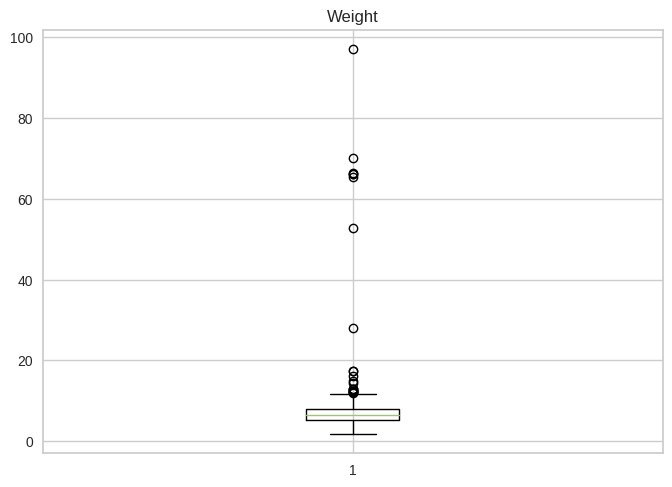

In [ ]:
plt.boxplot(df['weight'].dropna())
plt.title('Weight')
plt.show()

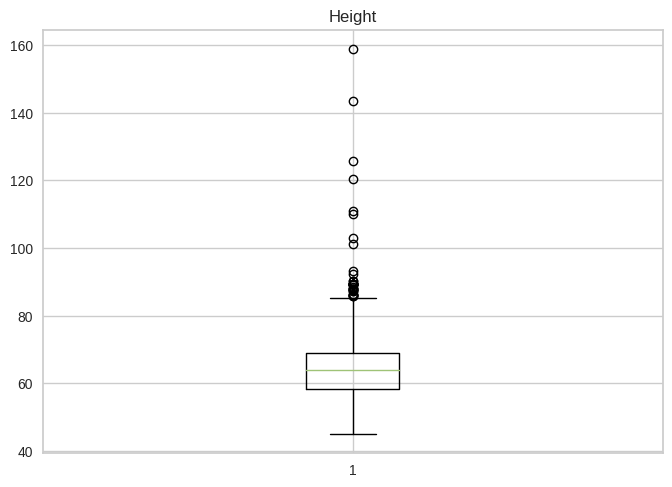

In [ ]:
plt.boxplot(df['height'].dropna())
plt.title('Height')
plt.show()

Revisamos si los Outliers corresponden a datos reales o problemas de digitacion

In [ ]:
weight = df['weight'] > 12
print(weight.sum())
df.loc[weight,:].head(22)

22


,state_code,rural_urban,date_survey,test_salt_iodine,record_code_iodine,sex,age_code,age,weight,height,...,day_or_month_for_breast_feeding,water_month,ani_milk_month,semisolid_month_or_day,solid_month,vegetables_month_or_day,illness_type,illness_duration,treatment_type,State
10507,0,1,2014-11-06,30,3,Female,1,7.0,12.400000,69.000000,...,5.0,5.0,5.0,6.0,6.0,6.0,0.0,NaN,NaN,UTTARAKHAND
16558,0,2,2014-09-25,30,3,Female,1,2.0,52.799999,120.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UTTARAKHAND
26431,0,1,2014-06-25,30,3,Female,1,10.0,12.500000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UTTARAKHAND
34825,0,1,2014-11-19,30,3,Female,1,9.0,12.400000,110.100000,...,6.0,6.0,6.0,6.0,6.0,6.0,0.0,NaN,NaN,UTTARAKHAND
39819,0,1,2014-07-25,30,3,Female,1,9.0,13.000000,88.000000,...,6.0,7.0,6.0,7.0,7.0,7.0,0.0,NaN,NaN,UTTARAKHAND
76032,2,2,2013-12-25,7,2,Male,1,8.0,17.299999,76.800003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ASSAM
78355,2,1,2014-07-15,30,3,Male,1,3.0,14.900000,58.700001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ASSAM
89216,2,1,2014-08-02,15,3,Female,1,4.0,66.400002,63.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ASSAM
98450,2,1,2014-12-22,15,3,Male,1,11.0,97.000000,70.000000,...,5.0,6.0,6.0,6.0,7.0,6.0,0.0,NaN,NaN,ASSAM
109300,2,1,2014-01-07,7,2,Male,1,9.0,13.000000,67.599998,...,5.0,6.0,8.0,9.0,0.0,0.0,0.0,0.0,NaN,ASSAM


La tabla anterior muestra los valores correspondientes a outliers en la variable 'weight', para saber los valores en rango normal para la edad revisamos las tablas de relacion peso/talla para niños y niñas menores de 1 año según la Organización Mundial de la Salud
> _*(Tomado de: *Arch Argent Pediatr 2009;107(2):126-133* [Scielo.org.ar](http://www.scielo.org.ar/pdf/aap/v107n2/v107n2a05.pdf))*_

El peso promedio para la edad de 12 meses esta al rededor de 10 kg, en el dataframe observamos valores extravagantes como 97 kg de peso para un niño de 11 meses de edad, otro con 66.4 kg de peso para una niña de 4 meses, una niña con 120 cm de estatura y 52 kg para una edad de 2 meses.


In [ ]:
height = df['height'] > 80
print(height.sum())
df.loc[height,:].head()

83


,state_code,rural_urban,date_survey,test_salt_iodine,record_code_iodine,sex,age_code,age,weight,height,...,day_or_month_for_breast_feeding,water_month,ani_milk_month,semisolid_month_or_day,solid_month,vegetables_month_or_day,illness_type,illness_duration,treatment_type,State
16558,0,2,2014-09-25,30,3,Female,1,2.0,52.799999,120.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UTTARAKHAND
21299,0,1,2014-03-07,0,1,Female,1,7.0,5.600000,103.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UTTARAKHAND
21313,0,1,2014-04-09,30,3,Male,1,7.0,6.500000,110.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UTTARAKHAND
21333,0,1,2014-03-07,0,1,Male,1,9.0,4.900000,101.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UTTARAKHAND
26423,0,1,2014-06-23,30,3,Male,1,4.0,12.000000,86.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UTTARAKHAND


Los valores identificados como outliers corresponden a errores de digitacion, por lo que los pasaremos a datos nulos y los rellenaremos con medidas aritmeticas.

In [ ]:
# Identificar los outliers en la columna "height" mayores a 80
outliers_height = df['height'] > 80

# Convertir los outliers a valores nulos (NaN)
df.loc[outliers_height, 'height'] = np.nan

In [ ]:
#Rellenamos los datos nulos de la columna 'height' con su mediana
median_height = df['height'].median()

# Rellenar los datos nulos en la columna "height" con la mediana
df['height'].fillna(median_height, inplace=True)

Graficamos Height sin outliers




In [ ]:
px.box(df,y= "height",
          title='Height sin Outliers')

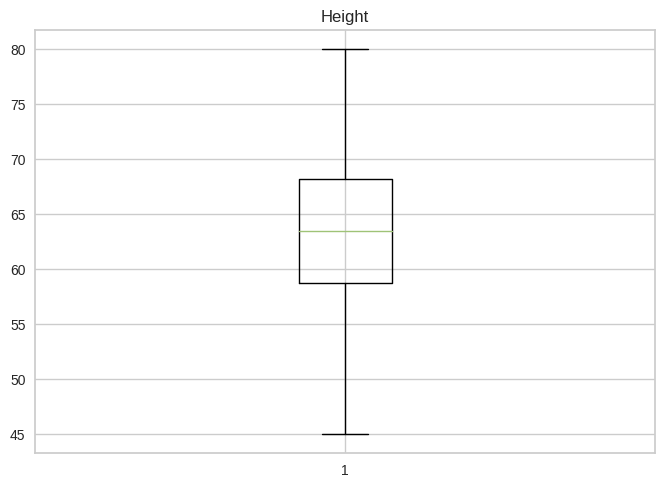

In [ ]:
#Graficamos height sin outliers
plt.boxplot(df['height'])
plt.title('Height')
plt.show()

In [ ]:
# Identificar los outliers en la columna "weight" mayores a 12
outliers_weight = df['weight'] >= 11

# Convertir los outliers a valores nulos (NaN)
df.loc[outliers_weight, 'weight'] = np.nan

In [ ]:
# Calcular la mediana de la columna "weight"
median_weight = df['weight'].median()

# Rellenar los datos nulos en la columna "weight" con la mediana
df['weight'].fillna(median_weight, inplace=True)

Graficamos Weight sin outliers

In [ ]:
px.box(df,y= "weight",
          title='Weight sin Outliers')

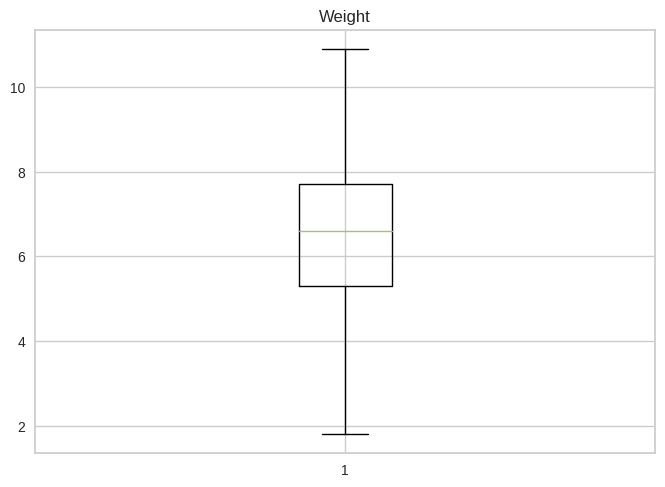

In [ ]:
#Graficamos weight sin outliers
plt.boxplot(df['weight'])
plt.title('Weight')
plt.show()

In [ ]:
# Definir una función para calcular 'weight_mean' y 'height_mean' basado en las condiciones
def calculate_means(row):
    weight_mean = None
    height_mean = None

    if (row['age_code'] == 0) and (row['age'] == 0):
      weight_mean = 3.3
      height_mean = 50.02
    elif (row['age_code'] == 'd') and (row['age'] < 7):
      weight_mean = 3.3
      height_mean = 51.45
    elif (row['age_code'] == 0) and (row['age'] < 15):
      weight_mean = 3.8
      height_mean = 52.1
    elif (row['age_code'] == 0) and (row['age'] < 22):
      weight_mean = 4.05
      height_mean = 53.05
    elif (row['age_code'] == 0) and (row['age'] <= 30):
      weight_mean = 4.32
      height_mean = 54
    elif (row['age_code'] == 1) and (row['age'] >= 1) and (row['age'] <= 11):
      weight_mean = 4.32 + (row['age'] - 1) * 0.94
      height_mean = 54 + (row['age'] - 1) * 1.25

    return pd.Series({'weight_mean': weight_mean, 'height_mean': height_mean})

# Aplicar la función a cada fila del DataFrame
df[['weight_mean', 'height_mean']] = df.apply(calculate_means, axis=1)

In [ ]:
df['height_mean'].value_counts()

57.75    344
60.25    342
59.00    332
56.50    322
61.50    321
62.75    304
64.00    276
55.25    269
65.25    219
66.50    201
54.00    190
Name: height_mean, dtype: int64

In [ ]:
group_weight = df.groupby('age')[['age_code','weight', 'weight_mean', 'height', 'height_mean']].mean()
group_weight.head()

,age_code,weight,weight_mean,height,height_mean
age,,,,,
1.0,1.0,4.687421,4.32,56.327474,54.00
2.0,1.0,4.924164,5.26,56.067658,55.25
3.0,1.0,5.196584,6.20,57.300931,56.50
4.0,1.0,5.721541,7.14,59.460174,57.75
5.0,1.0,6.160000,8.08,61.684036,59.00


**'is_cur_breast_feeding' to breastfed**

In [ ]:
df['is_cur_breast_feeding'].value_counts()

1.0    2642
2.0     225
Name: is_cur_breast_feeding, dtype: int64

Segun el diccionario de datos 'is_cur_breast_feeding' 1: Si 2:No

**'day_or_month_for_breast_feeding_' to 'breastfed_age'**

In [ ]:
df['day_or_month_for_breast_feeding_'].value_counts()

M    2785
D      73
m       1
Name: day_or_month_for_breast_feeding_, dtype: int64

In [ ]:
df['day_or_month_for_breast_feeding_'] = df['day_or_month_for_breast_feeding_'].replace({'D': 0, 'M':1, 'm':1})

In [ ]:
df['day_or_month_for_breast_feeding_'].value_counts()

1.0    2786
0.0      73
Name: day_or_month_for_breast_feeding_, dtype: int64

In [ ]:
df.rename(columns={'is_cur_breast_feeding': 'breastfed', 'day_or_month_for_breast_feeding_': 'breastfed_age_code', 'day_or_month_for_breast_feeding':'breastfed_age' }, inplace=True)

**Revisamos el resto de variables con datos nulos**

In [ ]:
df.isnull().sum()

state_code                    0
rural_urban                   0
date_survey                   0
test_salt_iodine              0
record_code_iodine            0
sex                           0
age_code                      0
age                           1
weight                        0
height                        0
haemoglobin_test           1057
haemoglobin                1413
haemoglobin_level          2124
first_breast_feeding        251
breastfed                   254
breastfed_age_code          262
breastfed_age               266
water_month                 281
ani_milk_month              288
semisolid_month_or_day      296
solid_month                 301
vegetables_month_or_day     304
illness_type                290
illness_duration           1968
treatment_type             1991
State                         0
weight_mean                   1
height_mean                   1
dtype: int64

**Caracteristicas con mayor cantidad de datos nulos**

In [ ]:
treatment_type_m = (df['treatment_type'].isna().sum()/len(df))*100
print(f"Datos nulos en 'treatment_type':{treatment_type_m:.2f}%")

illness_dur_m = (df['illness_duration'].isna().sum()/len(df))*100
print(f"Datos nulos en 'illness_duration':{treatment_type_m:.2f}%")

hb_level = df['haemoglobin_level'].isna().sum()/len(df)*100
print(f"Datos nulos en 'haemoglobin_level': {hb_level:.2f}%")

hb_m = df['haemoglobin'].isna().sum()/len(df)*100
print(f"Datos nulos en 'haemoglobin': {hb_m:.2f}%")

hb_t_m = df['haemoglobin_test'].isna().sum()/len(df)*100
print(f"Datos nulos en 'haemoglobin_test': {hb_t_m:.2f}%")

Datos nulos en 'treatment_type':63.79%
Datos nulos en 'illness_duration':63.79%
Datos nulos en 'haemoglobin_level': 68.06%
Datos nulos en 'haemoglobin': 45.27%
Datos nulos en 'haemoglobin_test': 33.87%


In [ ]:
age_missing = df['age'].isnull()
df.loc[age_missing,:].head()

,state_code,rural_urban,date_survey,test_salt_iodine,record_code_iodine,sex,age_code,age,weight,height,...,ani_milk_month,semisolid_month_or_day,solid_month,vegetables_month_or_day,illness_type,illness_duration,treatment_type,State,weight_mean,height_mean
252044,1,2,2014-03-22,30,3,Male,1,NaN,3.6,46.299999,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,CHHATTISGARH,NaN,NaN


In [ ]:
df = df.dropna(subset='age')

**Caracteristicas con menor datos nulos**

In [ ]:
illness_type_m = df['illness_type'].isna().sum()/len(df)*100
print(f"Datos nulos en 'illness_type': {illness_type_m:.2f}")

weight_m = df['weight'].isna().sum()/len(df)*100
print(f"Datos nulos en 'weight': {weight_m:.2f}%")

height_m = df['height'].isna().sum()/len(df)*100
print(f"Datos nulos en 'height': {height_m:.2f}%")

vegetables_m = df['vegetables_month_or_day'].isna().sum()/len(df)*100
print(f"Datos nulos en 'vegetables_month_or_day': {vegetables_m:.2f}%")

Datos nulos en 'illness_type': 9.29
Datos nulos en 'weight': 0.00%
Datos nulos en 'height': 0.00%
Datos nulos en 'vegetables_month_or_day': 9.74%


> **Nota:** Las caracteristicas que mas datos nulos tienen oscilan entre 35% y 68% de sus los datos.
Y las caracteristicas que menos datos nulos tienen oscilan entre 7% y 9.88% de sus datos.

**'Haemoglobin'**

La variable Haemoglobin tiene 46% de datos nulos, de los datos registrados solo el 37.1% se le tomo la muestra de sangre, y la variable 'haemoglobin_level' que registra el resultado de la hemoglobina tiene el 68% de datos nulos.

Podemos concluir que esta caracteristica del resultado de Hemoglobina en sangre no tiene buena representacion para hacer conclusiones con los datos finales, asi que elimnaremos estas variables relacionadas.

In [ ]:
df['haemoglobin_test'].value_counts()

1.0    1180
2.0     883
Name: haemoglobin_test, dtype: int64

In [ ]:
hb_one_sum = (df['haemoglobin_test']==1)
hb_one_sum.sum()/len(df)*100

37.82051282051282

Eliminamos ademas las dos variables restantes con mas del 64% de datos nulos



In [ ]:
df = df.drop(columns=['haemoglobin_test', 'haemoglobin_level', 'haemoglobin', 'illness_duration', 'treatment_type'])

In [ ]:
cat = df.select_dtypes(include='object')
cat.columns

Index(['rural_urban', 'sex', 'State'], dtype='object')

**'rural_urban'**

In [ ]:
df['rural_urban'].value_counts()

1    1495
1    1035
2     465
2     125
Name: rural_urban, dtype: int64

In [ ]:
#Cambiamos el tipo de dato de la columna rural_urban
df['rural_urban'] = df['rural_urban'].astype(int)

In [ ]:
#Verificamos
df['rural_urban'].value_counts()

1    2530
2     590
Name: rural_urban, dtype: int64

In [ ]:
df.isnull().sum()

state_code                   0
rural_urban                  0
date_survey                  0
test_salt_iodine             0
record_code_iodine           0
sex                          0
age_code                     0
age                          0
weight                       0
height                       0
first_breast_feeding       251
breastfed                  254
breastfed_age_code         262
breastfed_age              266
water_month                281
ani_milk_month             288
semisolid_month_or_day     296
solid_month                301
vegetables_month_or_day    304
illness_type               290
State                        0
weight_mean                  0
height_mean                  0
dtype: int64

El resto de caracteristicas que presentan menos del 10% de datos nulos las codificaremos con medidas estadisticas para rellenar los datos faltantes, para lo que utilzaremos OneHotEncoder.

**Estadisticas generales de los Datos**

In [ ]:
df.describe()

,state_code,rural_urban,test_salt_iodine,record_code_iodine,age_code,age,weight,height,first_breast_feeding,breastfed,breastfed_age_code,breastfed_age,water_month,ani_milk_month,semisolid_month_or_day,solid_month,vegetables_month_or_day,illness_type,weight_mean,height_mean
count,3120.000000,3120.000000,3120.000000,3120.000000,3120.0,3120.000000,3120.000000,3120.000000,2869.000000,2866.000000,2858.000000,2854.000000,2839.000000,2832.000000,2824.000000,2819.000000,2816.000000,2830.000000,3120.000000,3120.000000
mean,1.200000,1.189103,21.767949,2.737500,1.0,5.880128,6.537817,62.891295,1.276054,1.078507,0.974458,3.822355,2.525185,2.146540,1.976629,1.636396,1.413707,0.750883,8.907321,60.100160
std,0.709754,0.391653,10.258412,0.473068,0.0,2.896370,1.706956,7.385299,0.568638,0.269014,0.157793,2.544448,2.750741,2.915275,3.333747,3.338184,3.230903,1.046020,2.722588,3.620463
min,0.000000,1.000000,0.000000,1.000000,1.0,1.000000,1.800000,45.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.320000,54.000000
25%,1.000000,1.000000,15.000000,3.000000,1.0,3.000000,5.300000,58.774999,1.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.200000,56.500000
50%,1.000000,1.000000,30.000000,3.000000,1.0,6.000000,6.600000,63.500000,1.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.020000,60.250000
75%,2.000000,1.000000,30.000000,3.000000,1.0,8.000000,7.700000,68.199997,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,0.000000,0.000000,2.000000,10.900000,62.750000
max,2.000000,2.000000,30.000000,3.000000,1.0,11.000000,10.900000,80.000000,5.000000,2.000000,1.000000,41.000000,11.000000,12.000000,15.000000,18.000000,20.000000,4.000000,13.720000,66.500000


In [ ]:
df['age_code'].value_counts()

1    3120
Name: age_code, dtype: int64

<ipython-input-114-b29e2cbce561>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



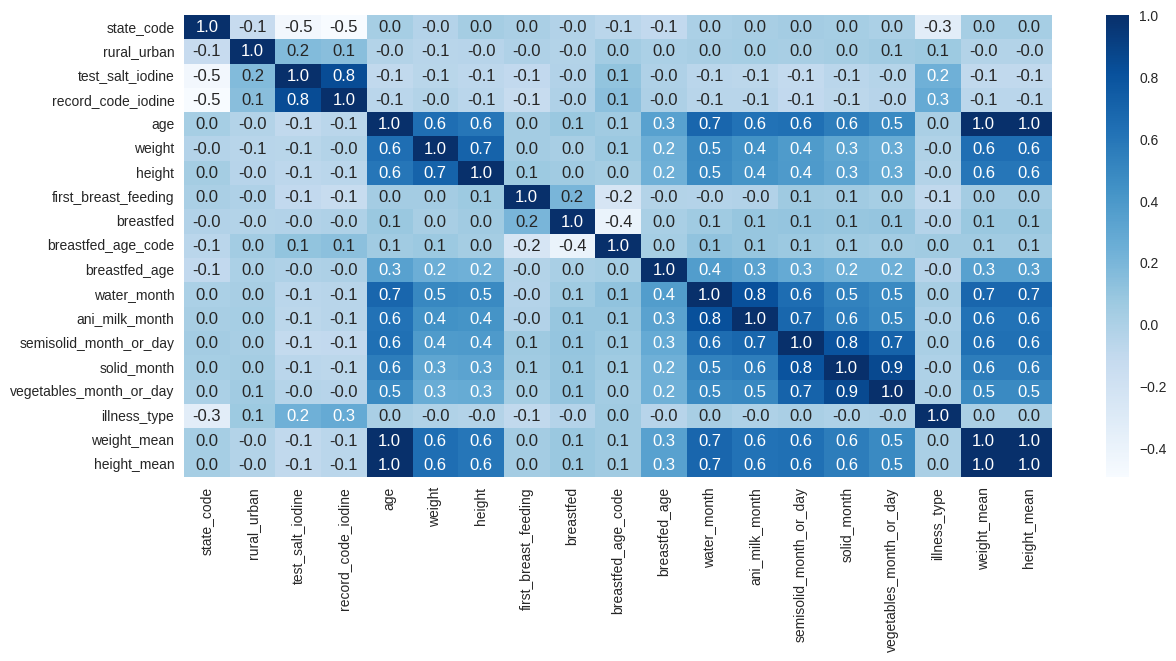

In [ ]:
# Calcular la matriz de correlación
columns_to_exclude = ['age_code']
corr = df.drop(columns=columns_to_exclude).corr()

# Crear el mapa de calor
plt.figure(figsize=(14, 6))
sns.heatmap(corr, cmap='Blues', annot=True, fmt=".1f")
plt.show()

Se ve mas relación entre las variables que la correlación inicial, porque se dejaron las variables que aplican a un tipo de edad.

# **III. Visualización de Datos**

**Relación de los Tipos de enfermedad aguda y los Resultados de Yodo en sangre**

In [ ]:
import plotly.graph_objects as go
fig = px.bar(df, x="illness_type", y="test_salt_iodine", color="sex",
             labels={'illness_type': 'Illness Type', 'test_salt_iodine': 'Test Salt Iodine'},
             title="Results of Iodine Tests Categorized by Illness Type and Gender of Children")

# Mostrar el gráfico
fig.show()

> **Nota**: Segun el diccionario de datos los datos en 'ilness_type' son:

* Diarrhoea / Dysentery=1
* Acute Respiratory Infection=2
* Fever of any type=3
* Other illnesses=4
* No illness=0

**Enfermedades Agudas en Lactantes menores Distribuidas por Estado**

In [ ]:
px.violin(df,x = 'illness_type',y='age', color='State',
          title='Enfermedades Agudas en Lactantes menores por Estado')

In [ ]:
print("Cuantos registros tiene Cada Estado en el Estudio:\n")
print(f"El estado de Uttarakhand tiene {shape_UT[0]} registros del total de los datos del dataframe")
print(f"El estado de Assam tiene {shape_AS[0]} registros del total de los datos del dataframe")
print(f"El estado de Chhatisgarh tiene {shape_CT[0]} resgistros del total de los datos del dataframe")

Cuantos registros tiene Cada Estado en el Estudio:

El estado de Uttarakhand tiene 67342 registros del total de los datos del dataframe
El estado de Assam tiene 142840 registros del total de los datos del dataframe
El estado de Chhatisgarh tiene 104915 resgistros del total de los datos del dataframe


In [ ]:
px.scatter(df, x="height", y="illness_type", size="age", color="State", size_max=35, title="Enfermedades agudas por Estado y Estatura")

> La grafica nos muestra la informacion de enfermedades agudas en los ultimos 15 días en los tres estados.
* Observamos que el estado de CHHATTISGARH tuvo las más alta presencia de todos los tipos de enfermedades reportadas en todas las edades de menores de 1 año.
* Los tres estados presentaron enfermedad tipo 3 (Fiebre por alguna causa diferente a Diarrea-Disentería/Infección Respiratoria Aguda).
* [Efectos de la desnutrición en el desarrollo infantil en la India](https://www.sciencedirect.com/science/article/pii/S2213398418300976), los niños en la India sufren infecciones recurrentes y multiples enfermedades en la primera infancia por causa de la desnutrición y condiciones de vida, especialmente en zonas rurales.

**Amamantamiento en Lactantes Menores**

In [ ]:
px.violin(df,x = 'breastfed',y='age', color='State',
          title='Está amamantando Sí=1 No=2 en relacion a la Edad y Estado')

In [ ]:
#df = df.drop(columns=['age_code'])

## **IV. Preprocesado**

## **K-Means Model**

In [ ]:
# seleccionamos columnas
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [ ]:
#Instanciar transformadores
# Imputers
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')
# Scaler
scaler = StandardScaler()

# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [ ]:
#Instanciar pipelines
# Numeric pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

# Categorical pipeline
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [ ]:
#Instanciar ColumnTransformer
# Tuples para Column Transformer
number_tuple = (numeric_pipe, num_selector)

category_tuple = (categorical_pipe, cat_selector)

# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7bd596805a50>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7bd596805030>)])

In [ ]:
# entrenamos el transformador
#Transformador de datos
# fit on train
preprocessor.fit(df)

# transform train and test
df_processed = preprocessor.transform(df)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [ ]:
df_processed = pd.DataFrame(df_processed)
df_processed

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-1.690997,2.070781,0.802597,0.554977,0.0,-0.649237,0.036435,0.082434,-4.072792e-16,-8.613510e-16,...,6.999012e-17,7.235265e-17,-1.114631e-16,-0.649237,-0.649237,1.0,0.0,0.0,0.0,1.0
1,-1.690997,2.070781,0.802597,0.554977,0.0,-0.994552,-1.779954,-1.068685,1.327877e+00,-3.045413e-01,...,-5.158042e-01,-4.606528e-01,-7.538645e-01,-0.994552,-0.994552,1.0,0.0,0.0,0.0,1.0
2,-1.690997,2.070781,0.802597,0.554977,0.0,-1.339867,-1.135429,-1.339537,-5.063451e-01,-3.045413e-01,...,-5.158042e-01,-4.606528e-01,-7.538645e-01,-1.339867,-1.339867,0.0,1.0,0.0,0.0,1.0
3,-1.690997,2.070781,0.802597,0.554977,0.0,-1.339867,-0.315124,-0.797834,1.327877e+00,-3.045413e-01,...,-5.158042e-01,-4.606528e-01,-7.538645e-01,-1.339867,-1.339867,0.0,1.0,0.0,0.0,1.0
4,-1.690997,2.070781,0.802597,0.554977,0.0,1.422654,0.329401,0.150147,1.327877e+00,-3.045413e-01,...,2.321063e+00,2.471974e+00,-7.538645e-01,1.422654,1.422654,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3115,-0.281833,2.070781,0.802597,0.554977,0.0,0.386709,1.091112,0.989787,-5.063451e-01,-3.045413e-01,...,-5.158042e-01,-4.606528e-01,-7.538645e-01,0.386709,0.386709,0.0,1.0,0.0,1.0,0.0
3116,-0.281833,2.070781,0.802597,0.554977,0.0,0.041394,-0.139345,0.786648,-5.063451e-01,-3.045413e-01,...,-5.158042e-01,-4.606528e-01,-7.538645e-01,0.041394,0.041394,0.0,1.0,0.0,1.0,0.0
3117,-0.281833,2.070781,-0.659852,0.554977,0.0,0.386709,0.739553,0.691851,-5.063451e-01,-3.045413e-01,...,-5.158042e-01,-4.606528e-01,-7.538645e-01,0.386709,0.386709,0.0,1.0,0.0,1.0,0.0
3118,-0.281833,2.070781,-0.659852,0.554977,0.0,0.732024,0.270808,0.989787,-5.063451e-01,-3.045413e-01,...,-5.158042e-01,-4.606528e-01,-7.538645e-01,0.732024,0.732024,0.0,1.0,0.0,1.0,0.0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

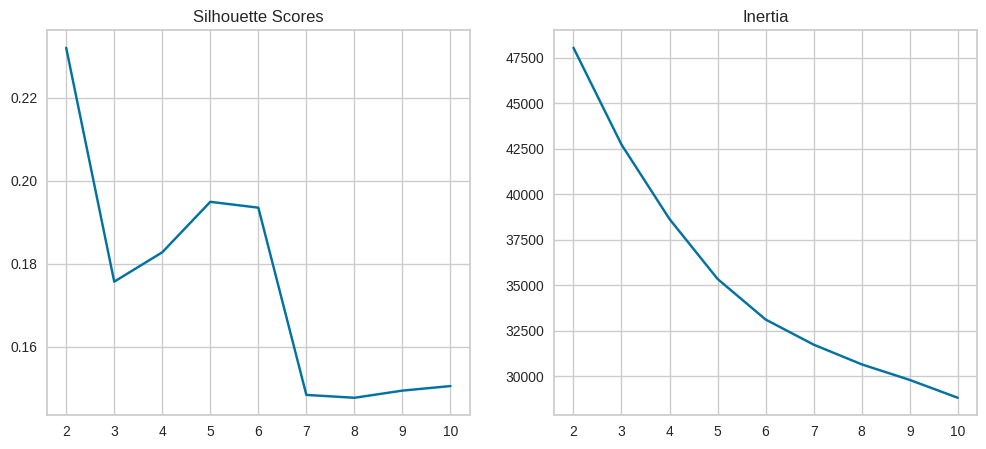

In [ ]:
# Iterate over a range of k clusters to find the optimal number of clusters
ks = range(2,11)
sils = []
inertias = []
for k in ks:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(df_processed)
  sils.append(silhouette_score(df_processed, kmeans.labels_))
  inertias.append(kmeans.inertia_)
#plot inertias and silhouette scores for each number of clusters.
fig, axes = plt.subplots(1,2, figsize=(12,5))
axes[0].plot(ks, sils)
axes[0].set_title('Silhouette Scores')
axes[0].set_xticks(ks)
axes[1].plot(ks, inertias)
axes[1].set_title('Inertia')
axes[1].set_xticks(ks);

**Ajustamos un modelo con tres Clusters**

In [ ]:
'''Ajustemos un nuevo modelo con 2 clústeres
   y agreguemos esos clústeres a una nueva columna
    en nuestro dataframe original (sin escala).
'''

# Refit KMeans with 3 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(df_processed)
# Add the clusters as a column in the dataframe
df['cluster'] = kmeans.labels_
df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,state_code,rural_urban,date_survey,test_salt_iodine,record_code_iodine,sex,age_code,age,weight,height,...,water_month,ani_milk_month,semisolid_month_or_day,solid_month,vegetables_month_or_day,illness_type,State,weight_mean,height_mean,cluster
34,0,2,2014-05-20,30,3,Female,1,4.0,6.6,63.5,...,NaN,NaN,NaN,NaN,NaN,NaN,UTTARAKHAND,7.14,57.75,1
5697,0,2,2014-08-24,30,3,Female,1,3.0,3.5,55.0,...,0.0,0.0,0.0,0.0,0.0,0.0,UTTARAKHAND,6.20,56.50,1
5698,0,2,2014-08-21,30,3,Male,1,2.0,4.6,53.0,...,0.0,0.0,0.0,0.0,0.0,0.0,UTTARAKHAND,5.26,55.25,1
5699,0,2,2014-08-22,30,3,Male,1,2.0,6.0,57.0,...,0.0,0.0,0.0,0.0,0.0,0.0,UTTARAKHAND,5.26,55.25,1
5700,0,2,2014-08-23,30,3,Female,1,10.0,7.1,64.0,...,6.0,6.0,9.0,9.0,9.0,0.0,UTTARAKHAND,12.78,65.25,0


In [ ]:
#Agruparemos los datos por clúster
#y agregaremos los grupos por los valores medios de cada característica.
# Add as_index=False so that the clusters are a column, not the index
cluster_groups = df.groupby('cluster', as_index=False).mean()
cluster_groups

<ipython-input-129-9b62e6222b10>:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,cluster,state_code,rural_urban,test_salt_iodine,record_code_iodine,age_code,age,weight,height,first_breast_feeding,...,breastfed_age_code,breastfed_age,water_month,ani_milk_month,semisolid_month_or_day,solid_month,vegetables_month_or_day,illness_type,weight_mean,height_mean
0,0,1.196094,1.190625,20.682813,2.701563,1.0,8.637500,7.736352,67.736265,1.296713,...,0.988754,4.800173,5.122184,4.797743,4.797215,3.999127,3.447069,0.757205,11.499250,63.546875
1,1,1.202717,1.188043,22.522826,2.762500,1.0,3.961957,5.704054,59.520880,1.262113,...,0.964747,3.156655,0.746588,0.328571,0.041791,0.020311,0.024507,0.746588,7.104239,57.702446


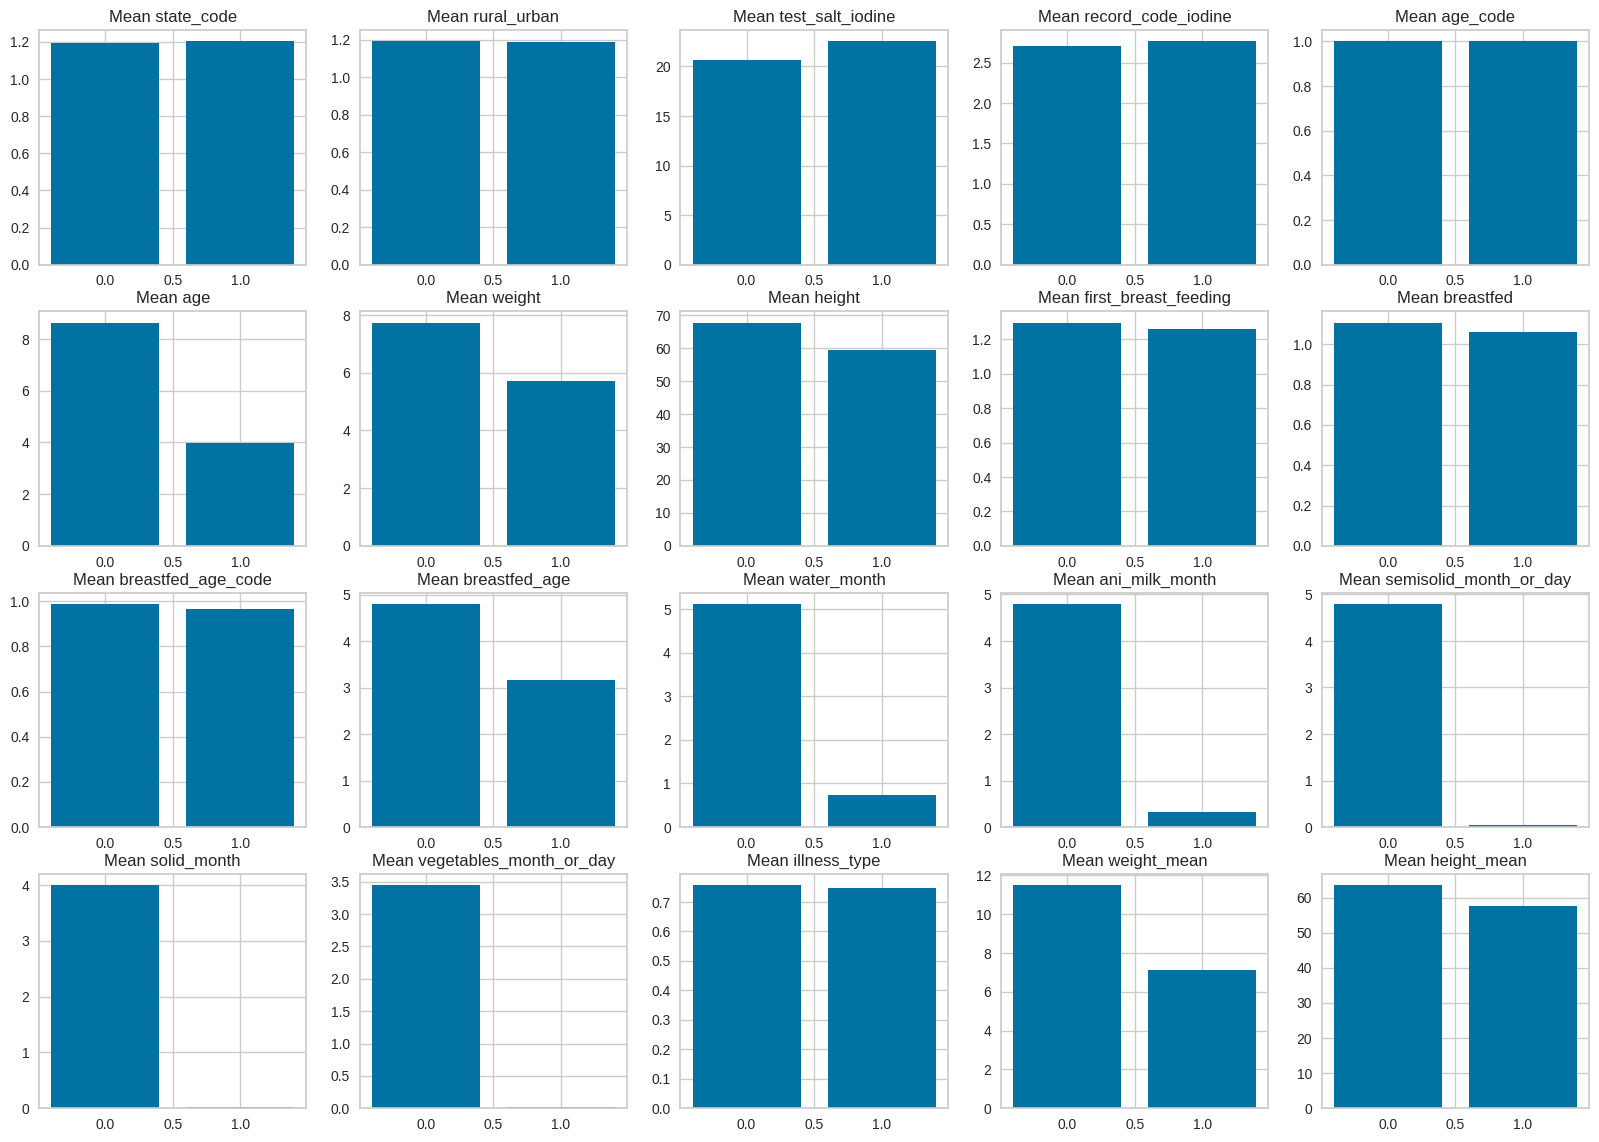

In [ ]:
# Visualize means
fig, axes = plt.subplots(4,5, figsize = (20, 14))
# fig is an array of dimensions 3,4.  axes.ravel() will flatten it to 12,1
axes = axes.ravel()
# Loop over columns and plot each in a separate figure, skip 'cluster' column
for i, col in enumerate(cluster_groups.columns[1:]):
  axes[i].bar(cluster_groups['cluster'], cluster_groups[col])
  axes[i].set_title(f'Mean {col}')

**Por 5 clusters**

In [ ]:
'''Ajustemos un nuevo modelo con 2 clústeres
   y agreguemos esos clústeres a una nueva columna
    en nuestro dataframe original (sin escala).
'''

# Refit KMeans with 3 clusters
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(df_processed)
# Add the clusters as a column in the dataframe
df['cluster'] = kmeans.labels_
df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,state_code,rural_urban,date_survey,test_salt_iodine,record_code_iodine,sex,age_code,age,weight,height,...,water_month,ani_milk_month,semisolid_month_or_day,solid_month,vegetables_month_or_day,illness_type,State,weight_mean,height_mean,cluster
34,0,2,2014-05-20,30,3,Female,1,4.0,6.6,63.5,...,NaN,NaN,NaN,NaN,NaN,NaN,UTTARAKHAND,7.14,57.75,4
5697,0,2,2014-08-24,30,3,Female,1,3.0,3.5,55.0,...,0.0,0.0,0.0,0.0,0.0,0.0,UTTARAKHAND,6.20,56.50,4
5698,0,2,2014-08-21,30,3,Male,1,2.0,4.6,53.0,...,0.0,0.0,0.0,0.0,0.0,0.0,UTTARAKHAND,5.26,55.25,4
5699,0,2,2014-08-22,30,3,Male,1,2.0,6.0,57.0,...,0.0,0.0,0.0,0.0,0.0,0.0,UTTARAKHAND,5.26,55.25,4
5700,0,2,2014-08-23,30,3,Female,1,10.0,7.1,64.0,...,6.0,6.0,9.0,9.0,9.0,0.0,UTTARAKHAND,12.78,65.25,2


In [ ]:
#Agruparemos los datos por clúster
#y agregaremos los grupos por los valores medios de cada característica.
# Add as_index=False so that the clusters are a column, not the index
cluster_groups = df.groupby('cluster', as_index=False).mean()
cluster_groups

<ipython-input-135-9b62e6222b10>:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,cluster,state_code,rural_urban,test_salt_iodine,record_code_iodine,age_code,age,weight,height,first_breast_feeding,...,breastfed_age_code,breastfed_age,water_month,ani_milk_month,semisolid_month_or_day,solid_month,vegetables_month_or_day,illness_type,weight_mean,height_mean
0,0,0.885876,1.197740,26.140113,2.992090,1.0,7.293785,7.556452,66.762938,1.206941,...,1.000,4.167742,3.635538,2.725618,1.062663,0.159686,0.092932,0.940415,10.236158,61.867232
1,1,1.557143,1.042857,14.285714,2.342857,1.0,4.885714,5.610000,60.947143,2.114286,...,0.000,1.797101,0.300000,0.228571,0.200000,0.085714,0.085714,0.362319,7.972571,58.857143
2,2,0.933333,1.266667,26.733333,2.994667,1.0,9.026667,7.690667,68.042133,1.320000,...,0.992,5.389333,5.566845,5.563003,7.570667,8.109333,7.291444,0.916890,11.865067,64.033333
3,3,1.875000,1.090686,6.526961,1.931373,1.0,4.073529,6.034338,61.408627,1.386059,...,1.000,3.357724,0.961538,0.381868,0.077135,0.019284,0.016529,0.172603,7.209118,57.841912
4,4,1.035305,1.238550,27.266221,3.000000,1.0,3.272901,5.199637,57.088836,1.187308,...,1.000,2.961856,0.267635,0.114583,0.029228,0.013584,0.020921,0.937630,6.456527,56.841126
5,5,1.949102,1.074850,7.541916,2.017964,1.0,9.197605,7.552695,67.274610,1.358108,...,1.000,4.804054,5.591216,5.550676,6.366438,4.910345,3.982699,0.231834,12.025749,64.247006


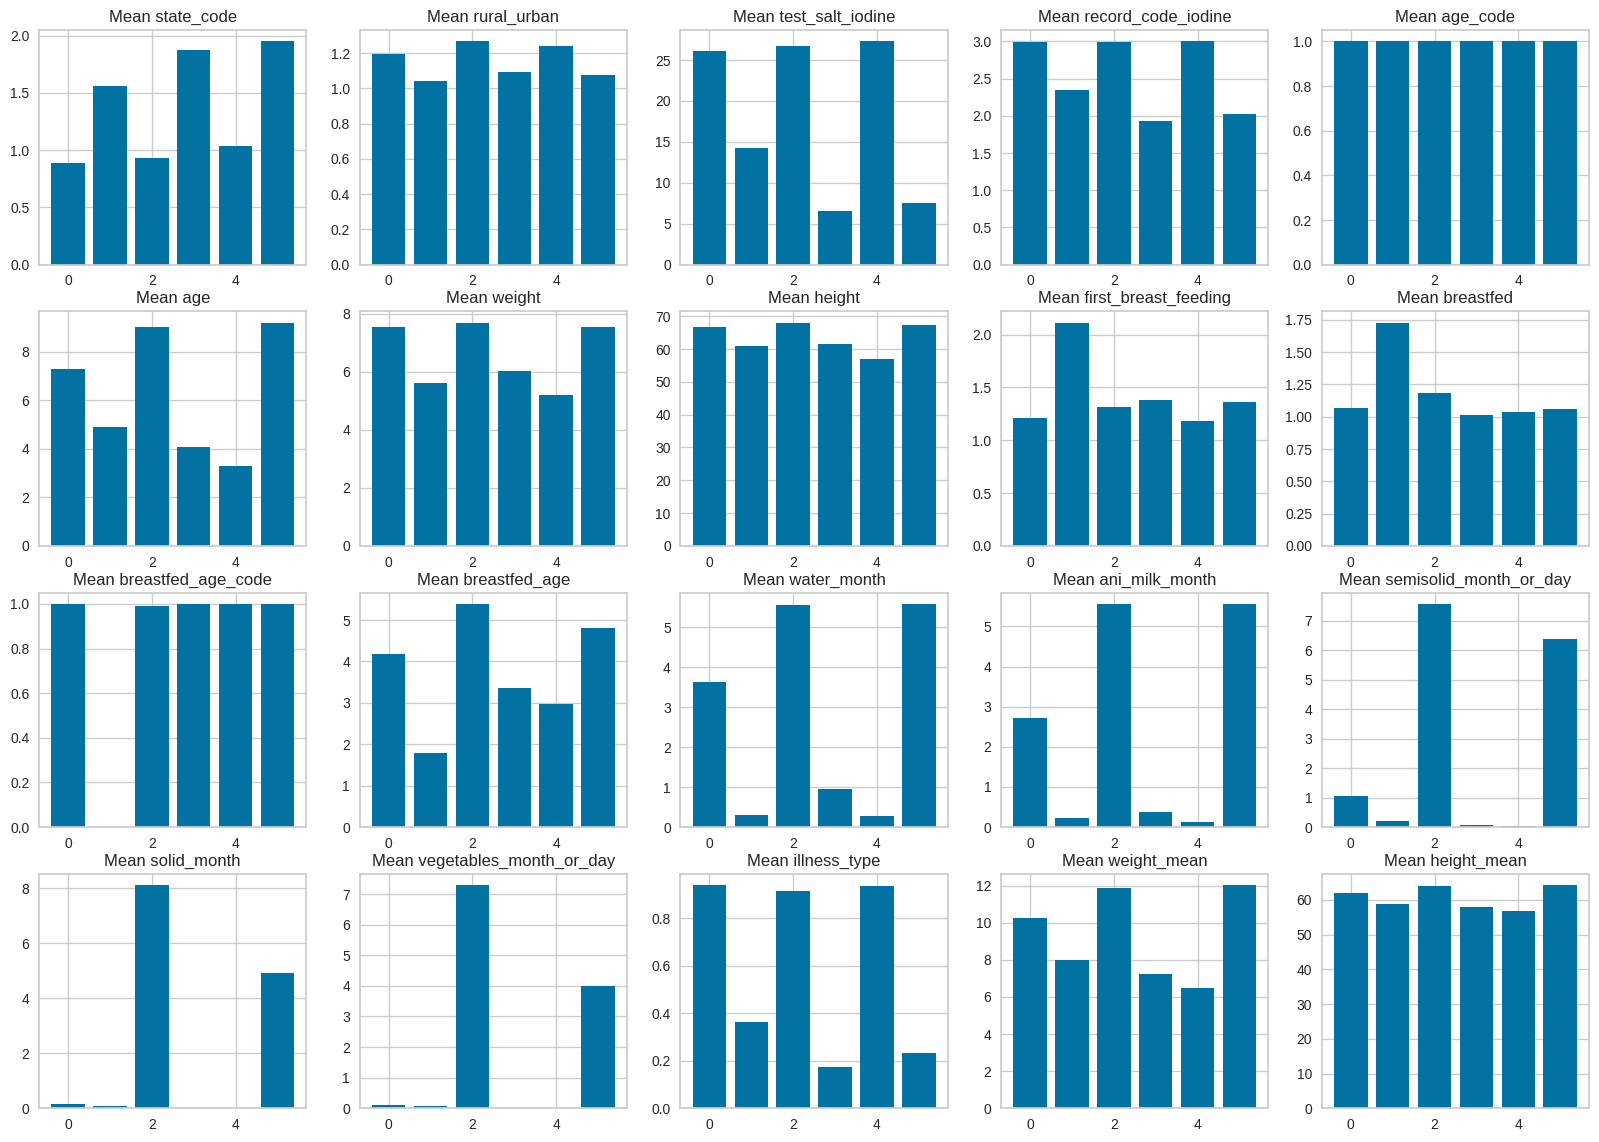

In [ ]:
# Visualize means
fig, axes = plt.subplots(4,5, figsize = (20, 14))
# fig is an array of dimensions 3,4.  axes.ravel() will flatten it to 12,1
axes = axes.ravel()
# Loop over columns and plot each in a separate figure, skip 'cluster' column
for i, col in enumerate(cluster_groups.columns[1:]):
  axes[i].bar(cluster_groups['cluster'], cluster_groups[col])
  axes[i].set_title(f'Mean {col}')

## **Agrupamiento Jerarquico**

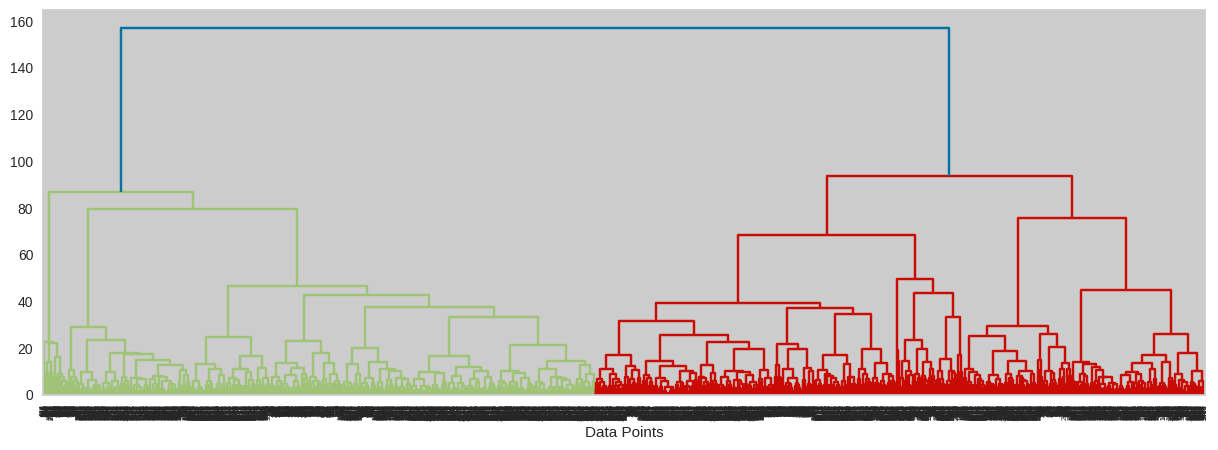

In [ ]:
# Visualize Dendogram
plt.figure(figsize = (15, 5))
sch.dendrogram(sch.linkage(df_processed, method = 'ward'))
plt.xlabel('Data Points');

In [ ]:
hc = AgglomerativeClustering(n_clusters=3)

hc.fit(df_processed)

AgglomerativeClustering(n_clusters=3)

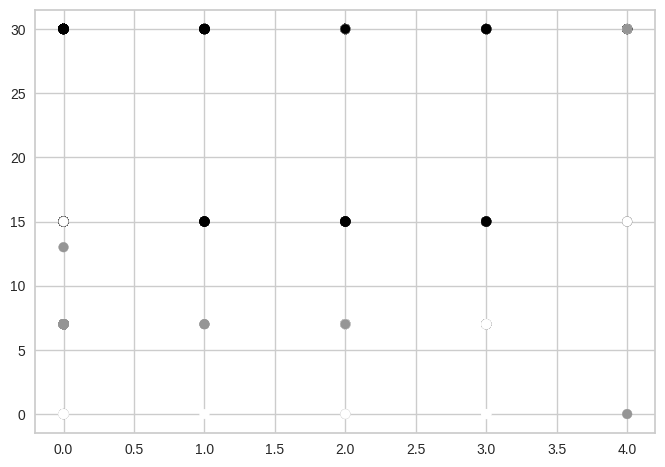

In [ ]:
df['cluster'] = hc.labels_

plt.scatter(df['illness_type'], df['test_salt_iodine'], c=df['cluster']);

## **Modelo DBSCAN**

In [ ]:
dbs = DBSCAN(eps = 0.5, min_samples = 5).fit(df_processed)

Text(0, 0.5, 'test_salt_iodine')

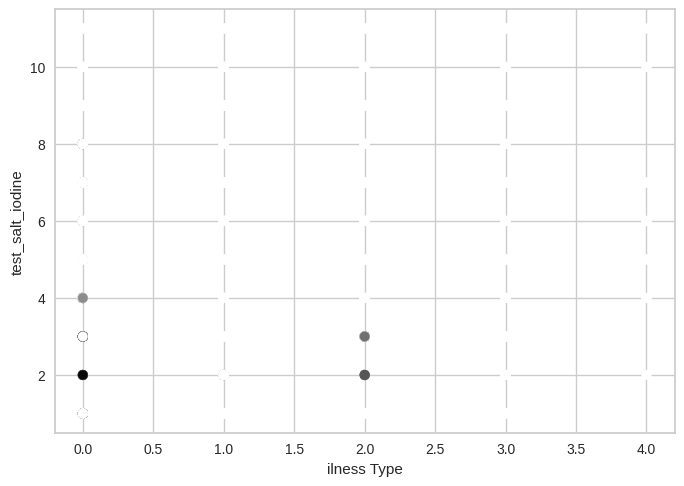

In [ ]:
df['cluster'] = dbs.labels_
#Visualize the labels
plt.scatter(df['illness_type'], df['age'], c=df['cluster'])
plt.xlabel('ilness Type')
plt.ylabel('test_salt_iodine')

Text(0, 0.5, 'test_salt_iodine')

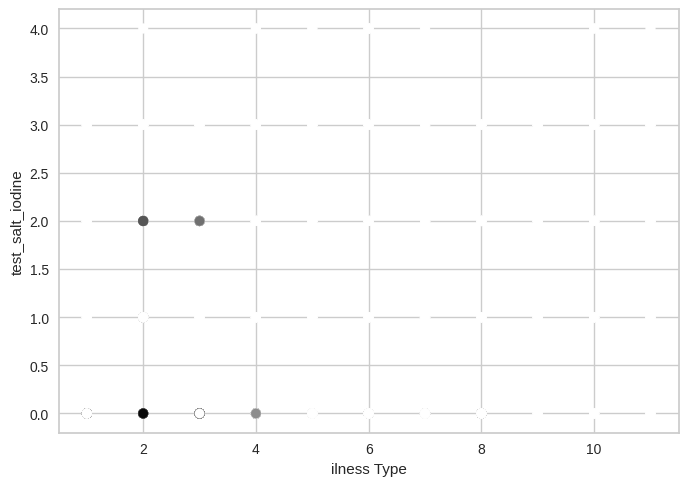

In [ ]:
df['cluster'] = dbs.labels_
#Visualize the labels
plt.scatter(df['age'], df['illness_type'], c=df['cluster'])
plt.xlabel('ilness Type')
plt.ylabel('test_salt_iodine')